# Chapter: Data Preprocessing

# Topic: Filter Methods for Variable Selection

In [2]:
# read data
import numpy as np; import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/My drive/hanhwa_AA/"

!git clone https://github.com/SungKu/Hanhwa_AA.git

linkpath = "/content/drive/My Drive/hanhwa_AA/"
dirname = os.getcwd()

data_pth = os.path.join(linkpath,'VSdata.csv')

VSdata = pd.read_csv(data_pth).values


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My drive/hanhwa_AA/'
/content
fatal: destination path 'Hanhwa_AA' already exists and is not an empty directory.


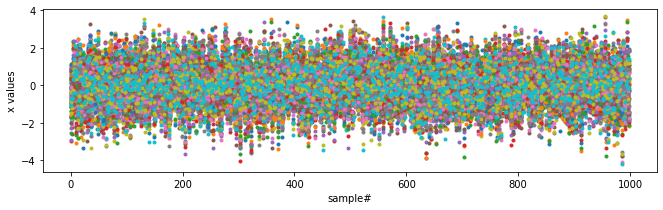

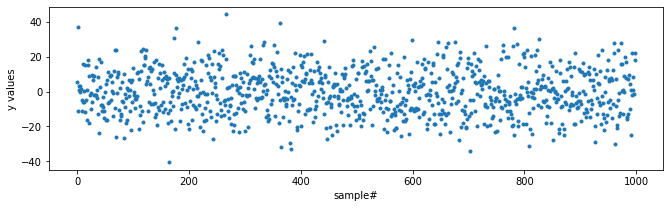

(<Figure size 792x216 with 1 Axes>,
 Text(0.5, 17.200000000000003, 'sample#'),
 Text(17.200000000000003, 0.5, 'y values'),
 None)

In [3]:
import matplotlib.pyplot as plt
# separate X and y
y = VSdata[:,0]
X = VSdata[:,1:]

plt.figure(figsize = (11,3)),plt.plot(X,'.'),plt.xlabel('sample#'),plt.ylabel('x values'),plt.show()
plt.figure(figsize = (11,3)),plt.plot(y,'.'),plt.xlabel('sample#'),plt.ylabel('y values'),plt.show()

In [4]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##           Linear correlation-based variable selection
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [5]:
# compute linear correlation based scores 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

VSmodel_Correlation = SelectKBest(f_regression, k=10).fit(X, y)
input_scores = VSmodel_Correlation.scores_

# find the top ranked inputs
top_k_inputs_Correlation = np.argsort(input_scores)[::-1][:10] + 1#  [::-1] reverses the array returned by argsort() and [:n] gives that last n elements
print(top_k_inputs_Correlation)

# reduce X to only top relevant inputs
X_relevant = VSmodel_Correlation.transform(X)

[22 21 24 20 30 29 32 31 28 27]


In [6]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##           MI-based variable selection
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [7]:
# compute linear correlation based scores 
from sklearn.feature_selection import mutual_info_regression

VSmodel_MI = SelectKBest(mutual_info_regression, k=10).fit(X, y)
input_scores = VSmodel_MI.scores_

# find the top ranked inputs
top_k_inputs_MI = np.argsort(input_scores)[::-1][:10] #  [::-1] reverses the array returned by argsort() and [:n] gives that last n elements
print(top_k_inputs_MI)

# reduce X to only top relevant inputs
X_relevant = VSmodel_MI.transform(X)


[ 8 21  5  0  4 37  1 13 30 16]
